<a href="https://colab.research.google.com/github/OlajideFemi/GeneralContent/blob/master/Back2Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

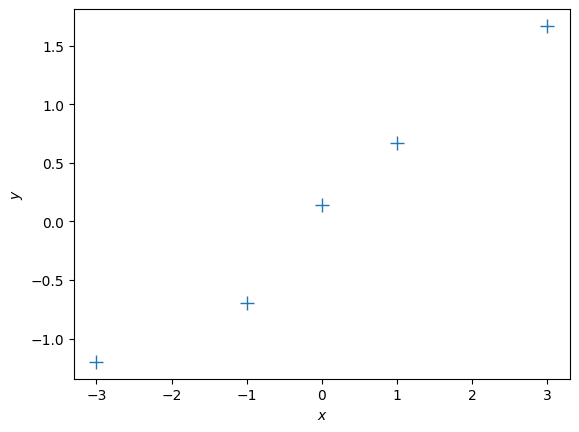

theta_ml = [[0.499]]


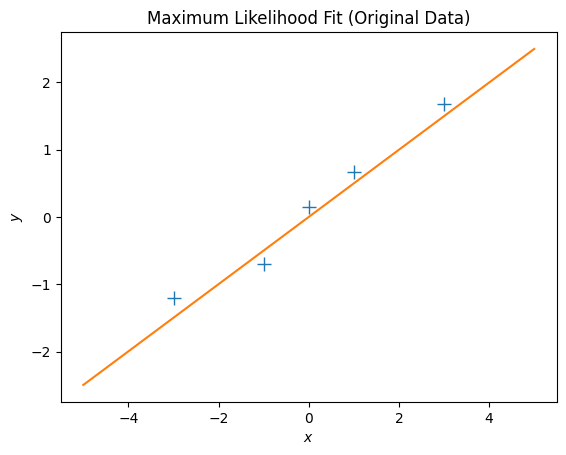

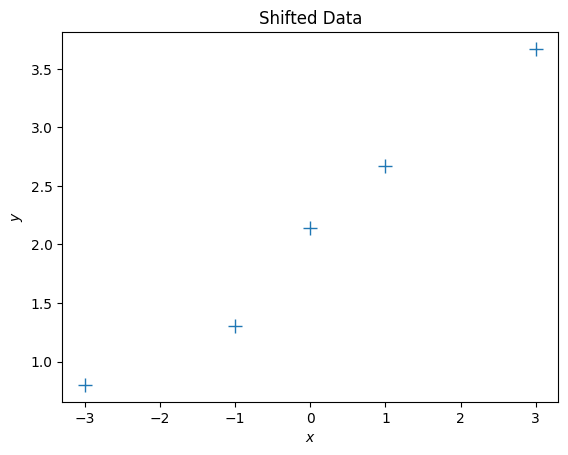

theta_ml (shifted data) = [[0.499]]


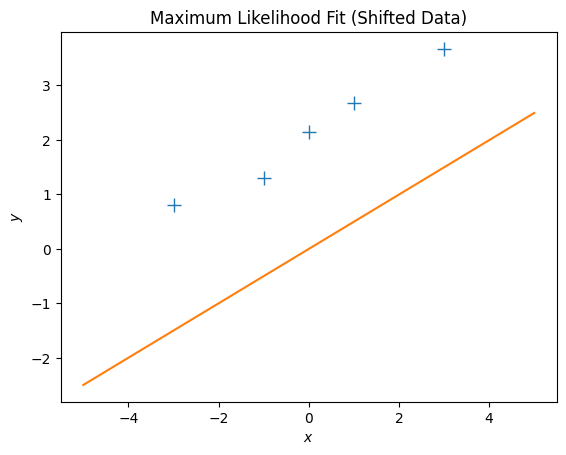

theta_aug_ml = [[0.116]
 [0.499]]


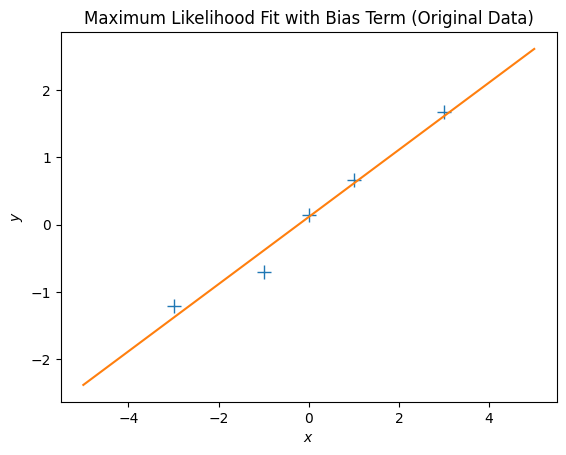

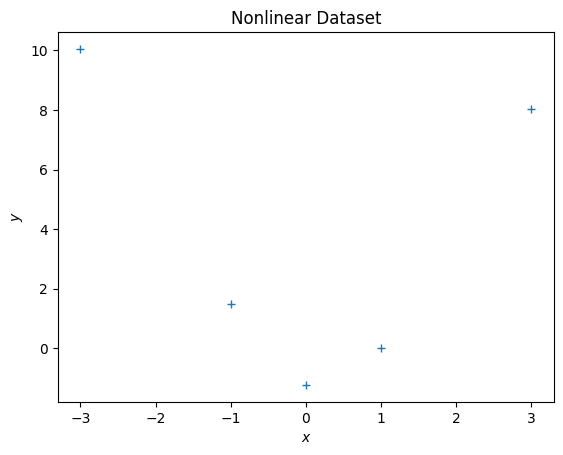

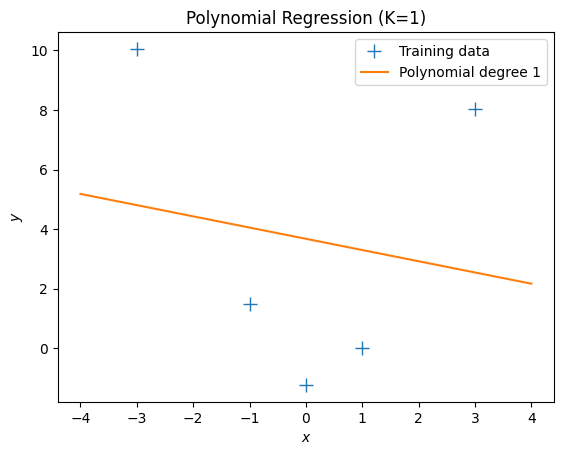

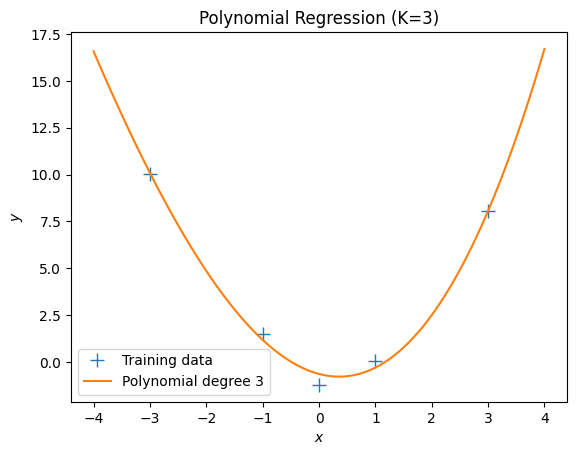

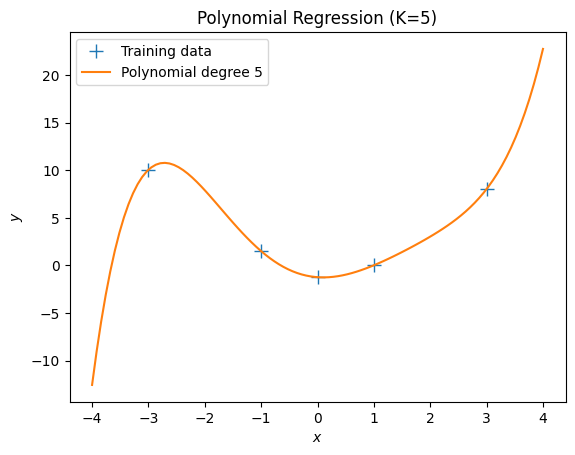

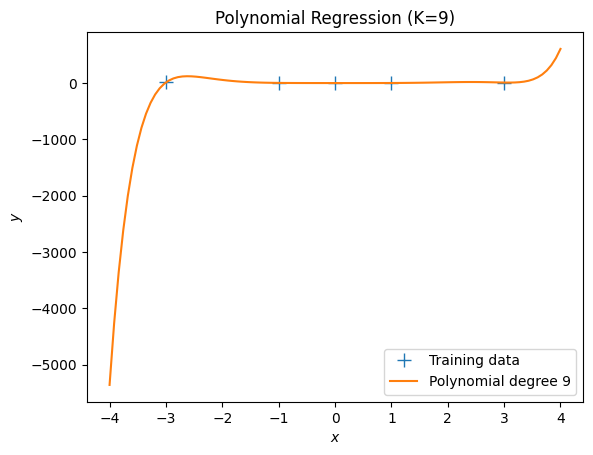

In [ ]:

#!/usr/bin/env python
# coding: utf-8

# # Linear Regression Tutorial
# by Marc Deisenroth

# The purpose of this notebook is to practice implementing some linear algebra (equations provided) and to explore some properties of linear regression.

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# Define training set
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1) # 5x1 vector, N=5, D=1
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1) # 5x1 vector

# Plot the training set
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

## 1. Maximum Likelihood

def max_lik_estimate(X, y):
    """
    X: N x D matrix of training inputs
    y: N x 1 vector of training targets/observations
    returns: maximum likelihood parameters (D x 1)
    """
    # Maximum likelihood estimate: θ = (X^T X)^{-1} X^T y
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_ml

# get maximum likelihood estimate
theta_ml = max_lik_estimate(X, y)
print("theta_ml =", theta_ml)

def predict_with_estimate(Xtest, theta):
    """
    Xtest: K x D matrix of test inputs
    theta: D x 1 vector of parameters
    returns: prediction of f(Xtest); K x 1 vector
    """
    # Linear prediction: y = X @ θ
    prediction = Xtest @ theta
    return prediction

# define a test set
Xtest = np.linspace(-5,5,100).reshape(-1,1) # 100 x 1 vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction = predict_with_estimate(Xtest, theta_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Original Data)")
plt.show()

# Add 2.0 to every y-value
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Shifted Data")
plt.show()

# get maximum likelihood estimate for shifted data
theta_ml_new = max_lik_estimate(X, ynew)
print("theta_ml (shifted data) =", theta_ml_new)

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction_new = predict_with_estimate(Xtest, theta_ml_new)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction_new)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit (Shifted Data)")
plt.show()

# Add bias term
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X]) # augmented training inputs of size N x (D+1)
theta_aug = np.zeros((D+1, 1)) # new theta vector of size (D+1) x 1

def max_lik_estimate_aug(X_aug, y):
    """
    X_aug: N x (D+1) matrix of augmented training inputs (with bias column of ones)
    y: N x 1 vector of training targets/observations
    returns: maximum likelihood parameters (D+1 x 1)
    """
    # Maximum likelihood estimate for augmented features
    theta_aug_ml = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y
    return theta_aug_ml

theta_aug_ml = max_lik_estimate_aug(X_aug, y)
print("theta_aug_ml =", theta_aug_ml)

# define a test set (we also need to augment the test inputs with ones)
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest]) # 100 x (D + 1) vector of test inputs

# predict the function values at the test points using the maximum likelihood estimator
ml_prediction_aug = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction_aug)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Maximum Likelihood Fit with Bias Term (Original Data)")
plt.show()

# New nonlinear dataset
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Nonlinear Dataset")
plt.show()

### Polynomial Regression

def poly_features(X, K):
    """
    X: inputs of size N x 1
    K: degree of the polynomial
    computes the feature matrix Phi (N x (K+1))
    """
    X = X.flatten()
    N = X.shape[0]

    # Initialize Phi
    Phi = np.zeros((N, K+1))

    # Compute the feature matrix: each column i is x^i
    for i in range(K+1):
        Phi[:, i] = X ** i

    return Phi

def nonlinear_features_maximum_likelihood(Phi, y):
    """
    Phi: features matrix for training inputs. Size of N x D
    y: training targets. Size of N by 1
    returns: maximum likelihood estimator theta_ml. Size of D x 1
    """
    kappa = 1e-08 # 'jitter' term; good for numerical stability

    D = Phi.shape[1]

    # Maximum likelihood estimate with regularization term
    # θ_ML = (Φ^T Φ + κI)^{-1} Φ^T y
    theta_ml = np.linalg.inv(Phi.T @ Phi + kappa * np.eye(D)) @ Phi.T @ y

    return theta_ml

# Try different polynomial degrees
for K in [1, 3, 5, 9]:
    Phi = poly_features(X, K) # N x (K+1) feature matrix

    theta_ml = nonlinear_features_maximum_likelihood(Phi, y) # maximum likelihood estimator

    # test inputs
    Xtest = np.linspace(-4,4,100).reshape(-1,1)

    # feature matrix for test inputs
    Phi_test = poly_features(Xtest, K)

    y_pred = Phi_test @ theta_ml # predicted y-values

    plt.figure()
    plt.plot(X, y, '+', markersize=10, label='Training data')
    plt.plot(Xtest, y_pred, label=f'Polynomial degree {K}')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(f"Polynomial Regression (K={K})")
    plt.legend()
    plt.show()



## Answers to Questions:

### Section 1 (Linear Model without Bias):
1. **Does the solution look reasonable?** The line passes through the data points reasonably well, but it's forced to go through the origin since there's no bias term.

2. **Playing with different θ values:** Changing θ changes the slope of the line. Larger positive θ gives steeper positive slope, negative θ gives negative slope.

3. **Modifying training targets:** Changing the y-values shifts the entire dataset. Without a bias term, the line still must pass through the origin, which explains the poor fit when we shifted the data by +2.

### Section 2 (Shifted Data):
1. **Why does the fit look bad after shifting?** The model has no bias term, so the line is forced to pass through the origin (0,0). When we shift all data points up by 2, they no longer pass through the origin, causing a poor fit.

2. **How to fix this problem?** Add a bias term (θ₀) to the model, which allows the line to have an intercept.

### Section 3 (Model with Bias):
1. **Effect of bias parameter:** The bias term allows the line to have a y-intercept, so it doesn't have to pass through the origin. This adds flexibility to fit data that isn't centered at zero.

2. **Playing with parameters:**
   - Changing θ₀ shifts the entire line up or down
   - Changing θ₁ changes the slope

### Polynomial Regression:
The polynomial features allow fitting nonlinear data. Higher-degree polynomials can fit more complex patterns but may overfit (the degree 9 polynomial shows wild oscillations between data points, which is a classic sign of overfitting).



Consider the data set $D = \{(\mathbf{x}_n,t_n)\}_{n=1}^{N}$, where the ordered pairs are formed by feature vectors $\mathbf{x}_n \in \mathbb{R}^d$ and labels $t_n \in \{-1,+1\}$. By Bayes Theorem we have that the posterior probability $P(t|\mathbf{x})$ for the class $t$ is given by:

$$P(t|\mathbf{x}) = \frac{P(\mathbf{x}|t)P(t)}{P(\mathbf{x}|-1)P(-1)+P(\mathbf{x}|+1)P(+1)}$$

where the priors $P(t)$ satisfy that $P(-1)+P(+1)=1$. If we model the distribution of features inside class $t$ by a Gaussian distribution with mean $\boldsymbol{\mu}_t$ and covariance matrix $\boldsymbol{\Sigma}_t$, demonstrate that:

1. The function $f: \mathbb{R}^d \rightarrow \{-1,0,1\}$ defined as:

$$\sigma(\mathbf{x}) = \operatorname{sgn} \left( \log P(\mathbf{x}|+1) - \log P(\mathbf{x}|-1) + \log \frac{P(+1)}{1-P(+1)} \right)$$

where $\operatorname{sgn}(x) = 1$ if $x > 0$, $-1$ if $x < 0$, and $0$ otherwise, is a discriminant function.

##Answer

The larger posterior probability provides the classification:

$$P(+1|\mathbf{x}) = \frac{P(\mathbf{x}|+1)P(+1)}{P(\mathbf{x}|+1)P(+1)+P(\mathbf{x}|-1)P(-1)}$$

$$P(-1|\mathbf{x}) = \frac{P(\mathbf{x}|-1)P(-1)}{P(\mathbf{x}|+1)P(+1)+P(\mathbf{x}|-1)P(-1)}$$

Taking logarithms:

$$y_+(\mathbf{x}) = \ln P(+1|\mathbf{x}) = \ln [P(\mathbf{x}|+1)P(+1)] - \ln[P(\mathbf{x}|+1)P(+1) + P(\mathbf{x}|-1)P(-1)]$$

$$y_-(\mathbf{x}) = \ln P(-1|\mathbf{x}) = \ln [P(\mathbf{x}|-1)P(-1)] - \ln[P(\mathbf{x}|+1)P(+1) + P(\mathbf{x}|-1)P(-1)]$$

Consider the difference:

$$y(\mathbf{x}) = y_+(\mathbf{x}) - y_-(\mathbf{x})$$

Then $\operatorname{sgn}(y(\mathbf{x})) = t_c = \operatorname{argmax}_t P(t|\mathbf{x})$

Computing the difference:

\begin{align*}
y(\mathbf{x}) &= \ln [P(\mathbf{x}|+1)P(+1)] - \ln[P(\mathbf{x}|+1)P(+1) + P(\mathbf{x}|-1)P(-1)] \\
&\quad - \{\ln [P(\mathbf{x}|-1)P(-1)] - \ln[P(\mathbf{x}|+1)P(+1) + P(\mathbf{x}|-1)P(-1)]\} \\
&= \ln P(\mathbf{x}|+1) - \ln P(\mathbf{x}|-1) + \ln\frac{P(+1)}{P(-1)}
\end{align*}

Since $P(+1)+P(-1)=1$, we have $P(-1)=1-P(+1)$, so:

$$y(\mathbf{x}) = \ln P(\mathbf{x}|+1) - \ln P(\mathbf{x}|-1) + \ln\frac{P(+1)}{1-P(+1)}$$

This is exactly the argument of the sign function in the definition of $\sigma(\mathbf{x})$, proving that $\sigma(\mathbf{x})$ is a discriminant function.

#Gaussian Case

For a Gaussian distribution, the probability density function is:

For $d=1$:
$$P(x|t) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2}(x-\mu)\frac{1}{\sigma^2}(x-\mu)\right\}$$

For $d>1$:
$$P(\mathbf{x}|t) = \left(\frac{1}{\sqrt{2\pi}}\right)^d \frac{1}{\sqrt{|\boldsymbol{\Sigma}_t|}} \exp\left\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_t)^T\boldsymbol{\Sigma}_t^{-1}(\mathbf{x}-\boldsymbol{\mu}_t)\right\}$$

Substituting into $y(\mathbf{x})$:

\begin{align*}
y(\mathbf{x}) &= \ln N(\mathbf{x}|\boldsymbol{\mu}_+,\boldsymbol{\Sigma}_+) - \ln N(\mathbf{x}|\boldsymbol{\mu}_-,\boldsymbol{\Sigma}_-) + \ln\frac{P(+1)}{1-P(+1)} \\
&= -\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_+)^T\boldsymbol{\Sigma}_+^{-1}(\mathbf{x}-\boldsymbol{\mu}_+) + \frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_-)^T\boldsymbol{\Sigma}_-^{-1}(\mathbf{x}-\boldsymbol{\mu}_-) \\
&\quad + \frac{1}{2}\ln\frac{|\boldsymbol{\Sigma}_-|}{|\boldsymbol{\Sigma}_+|} + \ln\frac{P(+1)}{1-P(+1)}
\end{align*}

This yields a quadratic discriminant function in general. For the special case where $\boldsymbol{\Sigma}_+ = \boldsymbol{\Sigma}_- = \boldsymbol{\Sigma}$, this simplifies to a linear discriminant:

$$y(\mathbf{x}) = (\boldsymbol{\mu}_+ - \boldsymbol{\mu}_-)^T\boldsymbol{\Sigma}^{-1}\mathbf{x} - \frac{1}{2}(\boldsymbol{\mu}_+^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_+ - \boldsymbol{\mu}_-^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_-) + \ln\frac{P(+1)}{1-P(+1)}$$

Which can be written as $y(\mathbf{x}) = \mathbf{w}^T\mathbf{x} + w_0$ with:
$$\mathbf{w} = \boldsymbol{\Sigma}^{-1}(\boldsymbol{\mu}_+ - \boldsymbol{\mu}_-)$$
$$w_0 = -\frac{1}{2}(\boldsymbol{\mu}_+^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_+ - \boldsymbol{\mu}_-^T\boldsymbol{\Sigma}^{-1}\boldsymbol{\mu}_-) + \ln\frac{P(+1)}{1-P(+1)}$$

